In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[3]  #o and 1 in output shows whether positive or negeative comment

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  
    return results

x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)

In [10]:
print(x_train[0])

print(x_train[1])

print(x_train[2])

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [11]:
#Preparing of data to fed into neural network

y_train = np.asarray(train_labels).astype('float32')

y_test = np.asarray(test_labels).astype('float32')

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 10s 699us/sample - loss: 0.4973 - accuracy: 0.7957 - val_loss: 0.4012 - val_accuracy: 0.8416
Epoch 2/20
15000/15000 [==============================] - 2s 126us/sample - loss: 0.2992 - accuracy: 0.9014 - val_loss: 0.3016 - val_accuracy: 0.8888
Epoch 3/20
15000/15000 [==============================] - 2s 104us/sample - loss: 0.2176 - accuracy: 0.9290 - val_loss: 0.2906 - val_accuracy: 0.8885
Epoch 4/20
15000/15000 [==============================] - 2s 107us/sample - loss: 0.1752 - accuracy: 0.9435 - val_loss: 0.2747 - val_accuracy: 0.8904
Epoch 5/20
15000/15000 [==============================] - 1s 99us/sample - loss: 0.1422 - accuracy: 0.9555 - val_loss: 0.2959 - val_accuracy: 0.8856
Epoch 6/20
15000/15000 [==============================] - 2s 104us/sample - loss: 0.1191 - accuracy: 0.9626 - val_loss: 0.2921 - val_accuracy: 0.8854
Epoch 7/20
15000/15000 [==========================

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

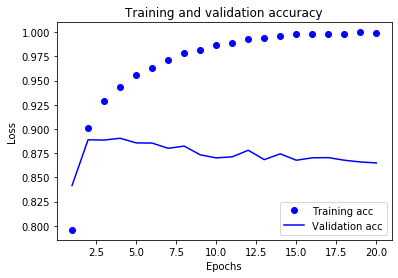

In [18]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 5s 194us/sample - loss: 0.4422 - accuracy: 0.8195
Epoch 2/4
25000/25000 [==============================] - 2s 70us/sample - loss: 0.2525 - accuracy: 0.9100
Epoch 3/4
25000/25000 [==============================] - 2s 65us/sample - loss: 0.1952 - accuracy: 0.9303
Epoch 4/4
25000/25000 [==============================] - 2s 66us/sample - loss: 0.1652 - accuracy: 0.9392
25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [20]:
results

[0.3129376842308044, 0.8754]

In [21]:
model.predict(x_test)

array([[0.27417946],
       [0.9996964 ],
       [0.9433613 ],
       ...,
       [0.17675045],
       [0.13505188],
       [0.6250621 ]], dtype=float32)